In [1]:
%load_ext autoreload
%autoreload 2

# Generación de datos

In [ ]:
from src.data_gen import generate_instances

instances = generate_instances(filename="TSP50.pkl", instance_count=100, cities=50, seed=42)

In [11]:
from src.data_gen import generate_instances

instances = generate_instances(filename="benchmarks/b100.pkl", instance_count=100, cities=100, seed=42100)

In [23]:
from src.data_gen import generate_train_data

generate_train_data(instance_file="TSP50.pkl", data_filename="TSP50_data.pkl")

# Entrenamiento

In [45]:
from src.training import load_data

dataset = load_data(file_path="TSP50_data.pkl")

In [53]:
from src.models.transformer_v4 import TSPTransformer

# Parámetros del modelo
input_dim = 2
embed_dim = 64
num_heads = 4
head_dim = 32
num_encoder_layers = 2
num_glimpses = 2
dropout = 0.1

# Crear modelo
model = TSPTransformer(
    input_dim=input_dim,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_encoder_layers=num_encoder_layers,
    num_glimpses=num_glimpses,
    dropout_rate=dropout
)

In [54]:
from src.training import train

epochs = 100
train_size = 2400
test_size = 600
batch_size = 32
learning_rate = 1e-4
seed = 42

model = train(model, dataset, epochs, train_size, test_size, batch_size, learning_rate, seed)

Usando dispositivo: cpu
Epoch 1/100 - Train Loss: 3.8528, Train Accuracy: 13.08% - Val Loss: 3.8205, Val Accuracy: 17.17%
Epoch 2/100 - Train Loss: 3.7709, Train Accuracy: 24.83% - Val Loss: 3.6594, Val Accuracy: 45.33%
Epoch 3/100 - Train Loss: 3.6069, Train Accuracy: 46.12% - Val Loss: 3.5607, Val Accuracy: 51.83%
Epoch 4/100 - Train Loss: 3.5311, Train Accuracy: 50.29% - Val Loss: 3.5120, Val Accuracy: 52.33%
Epoch 5/100 - Train Loss: 3.4998, Train Accuracy: 51.08% - Val Loss: 3.4993, Val Accuracy: 51.50%


KeyboardInterrupt: 

In [39]:
from src.training import save_model
save_model(model, filename="model_v3_2.pth")

# Validación

Predicted cost: 5.883056973881898


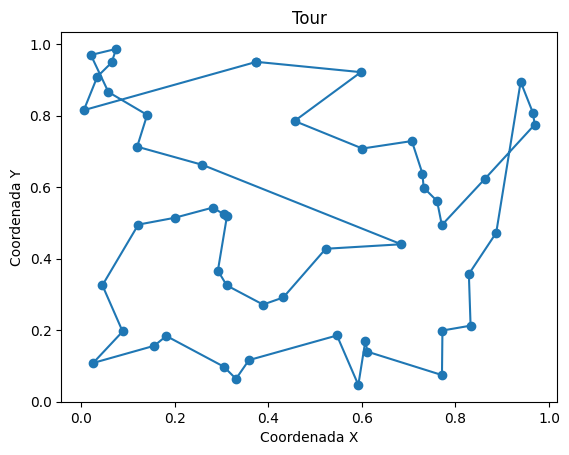

In [34]:
from src.solvers.model import ModelSolver

model_solver = ModelSolver(model)
model_sol = model_solver.solve(instance_file="TSP50.pkl", instance_number=0)

print("Predicted cost:", model_sol.cost)
model_sol.plot()

Optimal cost: 5.393124245897437


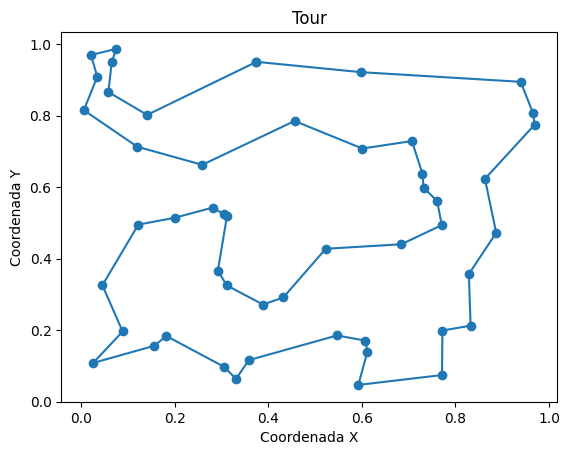

In [35]:
from src.data_gen import read_instances
from src.solvers.ortools import solve

instances = read_instances("TSP50.pkl")
instance = instances[0]
ortools_sol = solve(instance)
print("Optimal cost:", ortools_sol.cost)
ortools_sol.plot()

In [43]:
from src.training import load_model

model = load_model(model, filename="model_v3.pth")

In [44]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver

instance_file = "benchmarks/b100.pkl"
instances = read_instances(instance_file)
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for i, instance in enumerate(instances):
    model_sol = model_solver.solve(instance_file=instance_file, instance_number=i)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 10.602510173712961
